In [28]:
from alplakes import parse_alplakes_1d_from_directory
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
# Folder containing the JSON files
folder_path = '../data/alplakes_1d/geneva/'  # Update this to your specific folder path
simstrat_data = parse_alplakes_1d_from_directory(folder_path)

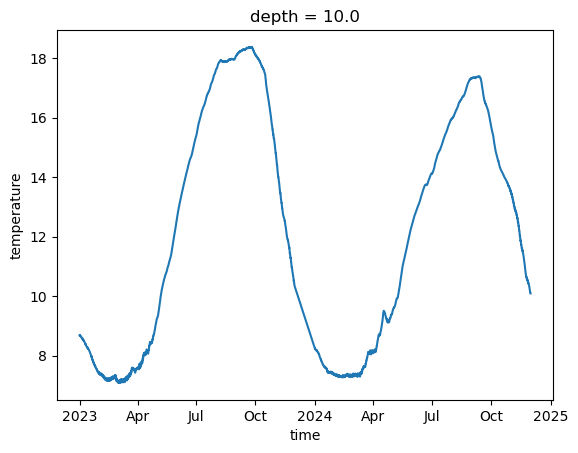

In [9]:
simstrat_data['temperature'].sel(depth=10, method='nearest').plot()

In [12]:
forcing_simstrat = pd.read_csv('../data/alplakes_1d/geneva/forcing/Forcing.dat', sep='\s+')

In [15]:
# start of the time serie on 01.01.1981 00:00:00
date_ref=datetime.datetime(1981,1,1)

# create a time vector
forcing_simstrat['time'] = pd.to_timedelta(forcing_simstrat['Time_[d]'],'d') + date_ref

# set the index as time
forcing_simstrat.set_index("time", inplace = True)
forcing_simstrat.index = forcing_simstrat.index.round('h')

# print the first lines
forcing_simstrat.head()

,Time_[d],u_[m/s],v_[m/s],Tair_[°C],sol_[W/m2],vap_[mbar],cloud_[-],rain_[m/hr]
time,,,,,,,,
1981-01-02 00:00:00,1.0000,-0.8756,-1.4572,2.346,2.0,4.2,0.8448,0.0
1981-01-02 01:00:00,1.0417,-0.7981,-1.5010,2.346,3.0,4.2,0.8207,0.0
1981-01-02 02:00:00,1.0833,-0.7778,-0.7778,2.346,0.0,4.3,0.8052,0.0
1981-01-02 03:00:00,1.1250,-0.1219,-0.9925,2.646,1.0,4.6,0.8018,0.0
1981-01-02 04:00:00,1.1667,1.5844,-0.2227,2.846,1.0,4.8,0.8039,0.0


In [30]:
ds_forcing = xr.Dataset.from_dataframe(forcing_simstrat)

In [45]:
ds_crop = ds_forcing.sel(time=slice(datetime.datetime(2023,1,1),datetime.datetime(2025,1,1)))

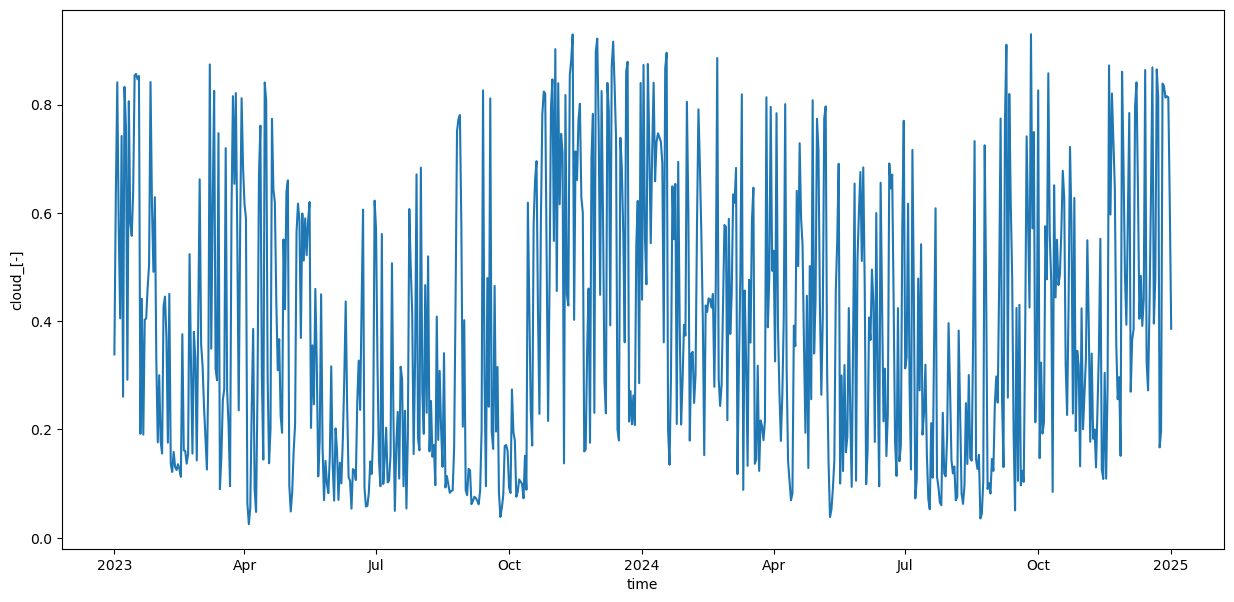

In [47]:
ds_crop['cloud_[-]'].resample(time='1D').mean().plot(figsize=(15,7))

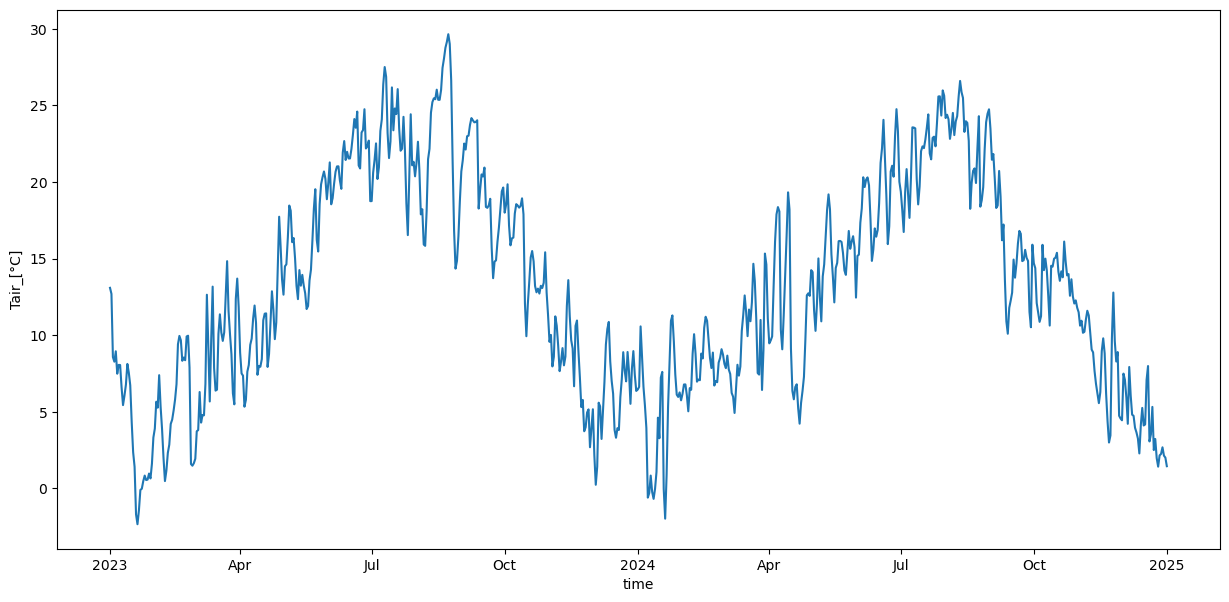

In [46]:
ds_crop['Tair_[°C]'].resample(time='1D').mean().plot(figsize=(15,7))

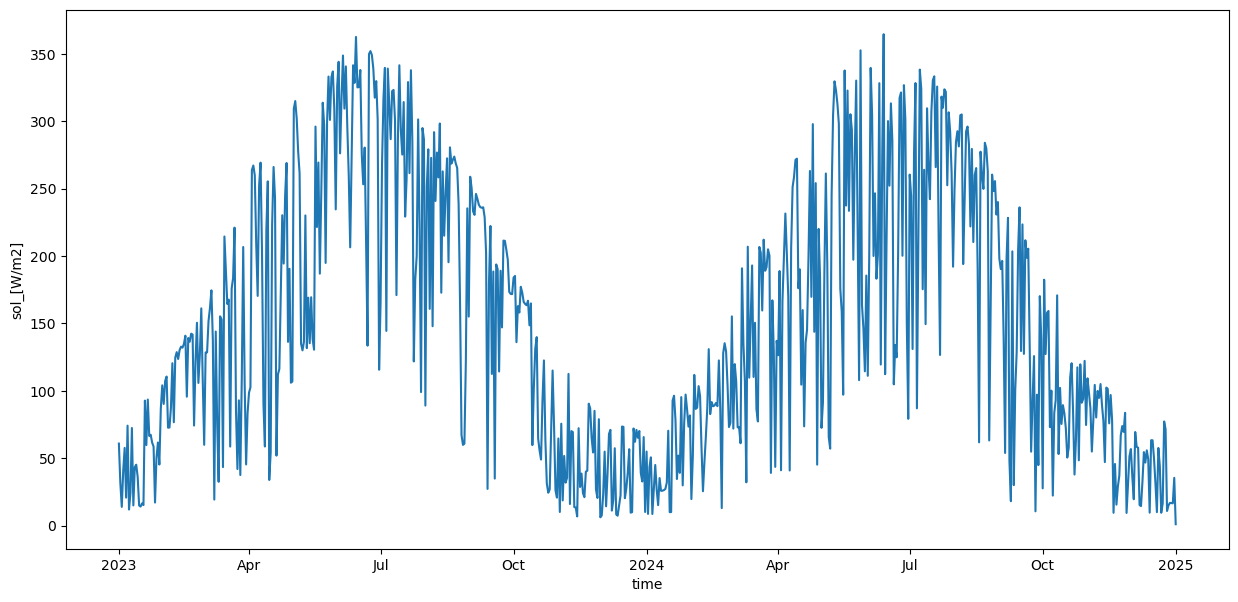

In [48]:
ds_crop['sol_[W/m2]'].resample(time='1D').mean().plot(figsize=(15,7))

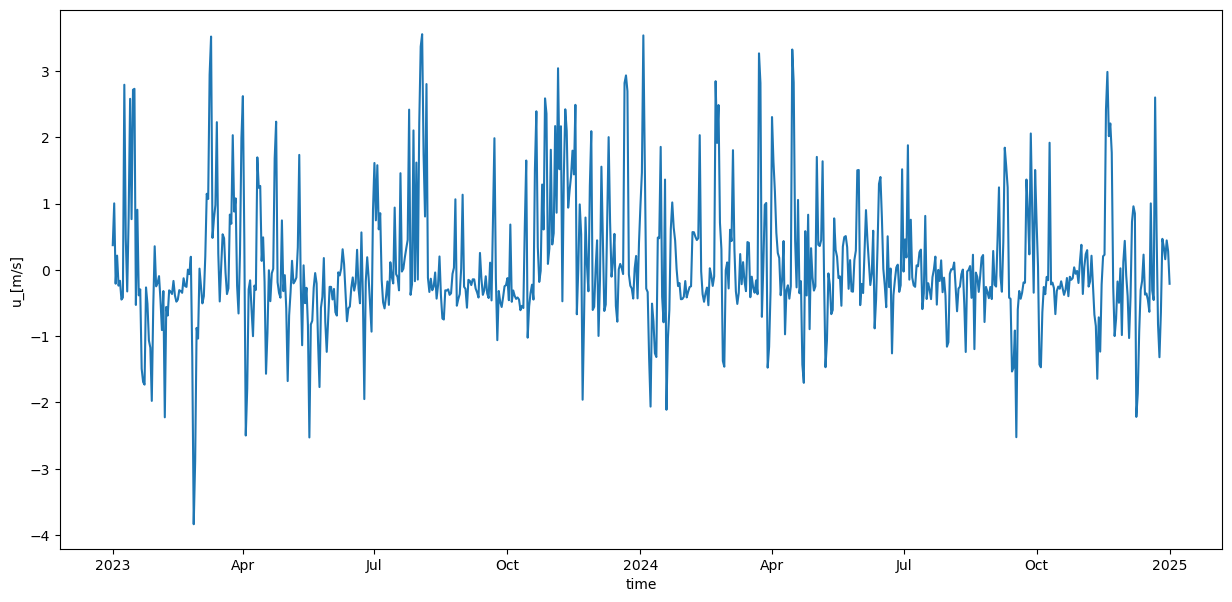

In [49]:
ds_crop['u_[m/s]'].resample(time='1D').mean().plot(figsize=(15,7))